# Домашнее задание 3.3
## Работа с данными
### выполнила Щеглова Полина, СКБ172

В данном задании проведем анализ реальных данных. Воспользуемся основной интерпретацией гипергеометрического распределения - выборки из генеральной совокупности. Проще говоря, в терминах используемых далее данных, имея исходы 100 партий для 6 игроков, мы берем выборки размера 10 партий и смотрим какова вероятность, что игрок проиграл/выиграл в ровно $x$ из них.
Типичная интерпретация - основа любой нетипичной интерпретации, поэтому для дальнейшей успешной работы с чем-то более сложным, стоит сначала разобраться с более простым.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame()
r = (open('win-loss.csv', 'r', encoding='utf-8').read()).replace('\n', ';').split(';')
df['Номер игрока'] = list(map(int,r[::2]))
df['Итог'] = list(map(int,r[1::2])) # 0-победа, 1-проигрыш
df

,Номер игрока,Итог
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1
5,5,1
6,0,0
7,1,0
8,2,0
9,3,0


In [91]:
from functools import reduce
#будем брать выборки размера 10 и считать суммарное количество проигрышей в каждой выборке.
# так как возможных сочетаний Binomial[100,10], можно взять 900 вариантов сочетаний и посчитать для каждого сумму проигрышей

def find_prob(num_play):
    loss_sum = []
    for i in np.arange(90):
        parties = df[df['Номер игрока']==num_play]['Итог']
        for j in np.arange(10):
            loss_sum.append(np.sum(parties[j+i:j+i+10])) 
    return loss_sum

def sample_mean(array_):
    sample_=len(array_)
    return reduce(lambda a,b : a+b, array_)/sample_
def sample_variance(array_):
    sample_=len(array_)
    sample_mean_ = sample_mean(array_)
    return reduce(lambda a,b : a+b, list(map(lambda j: (j-sample_mean_)**2, array_)))/(sample_-1)

loss_sum_1 = find_prob(0)
print(sample_mean(loss_sum_1), sample_variance(loss_sum_1))

loss_sum_2 = find_prob(1)
print(sample_mean(loss_sum_2), sample_variance(loss_sum_2))

loss_sum_3 = find_prob(2)
print(sample_mean(loss_sum_3), sample_variance(loss_sum_3))

loss_sum_4 = find_prob(3)
print(sample_mean(loss_sum_4), sample_variance(loss_sum_4))

loss_sum_5 = find_prob(4)
print(sample_mean(loss_sum_5), sample_variance(loss_sum_5))

loss_sum_6 = find_prob(5)
print(sample_mean(loss_sum_6), sample_variance(loss_sum_6))

5.655555555555556 2.092571993573122
4.77 1.756829810900997
4.724444444444444 1.167588678778887
4.318888888888889 3.7547039920899903
5.614444444444445 3.4985675441848945
4.524444444444445 2.0071882338400635


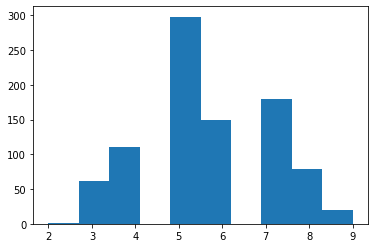

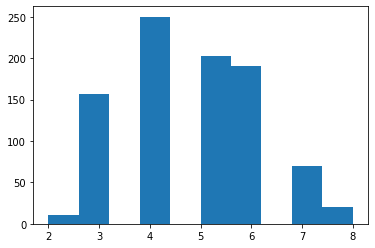

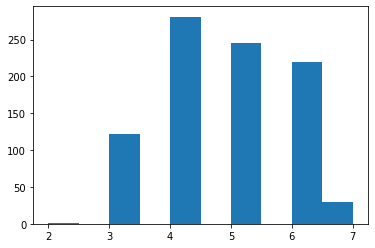

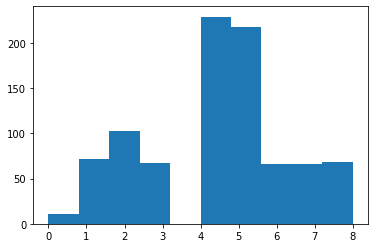

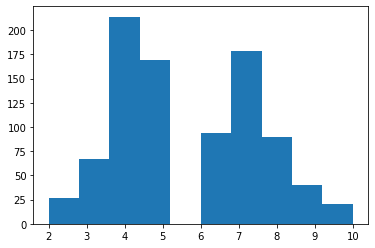

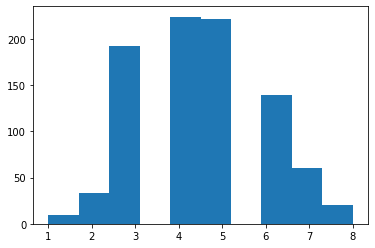

In [87]:
plt.hist(loss_sum_1, bins=10)
plt.show()

plt.hist(loss_sum_2, bins=10)
plt.show()

plt.hist(loss_sum_3, bins=10)
plt.show()

plt.hist(loss_sum_4, bins=10)
plt.show()

plt.hist(loss_sum_5, bins=10)
plt.show()

plt.hist(loss_sum_6, bins=10)
plt.show()

Теперь, считая все 6 случайных величин распределенным по гипергеометрическому закону с параметрами: $N=100, n=10$ проверим сколько раз каждый игрок проиграл за все 100 партий (то есть оценим парметр $M$ и сравним с реальным). Таким образом, мы фактически взяли обучающую выборку и по ней обучились считать количество выигрышей.

In [89]:
def total_loss(num_play):
    loss_sum = np.sum( df[df['Номер игрока']==num_play]['Итог'] )
    return loss_sum

print("Значение параметра \t Оценка параметра")
print(f"{total_loss(0)}\t\t\t {10*sample_mean(loss_sum_1)}")
print(f"{total_loss(1)}\t\t\t {10*sample_mean(loss_sum_2)}")
print(f"{total_loss(2)}\t\t\t {10*sample_mean(loss_sum_3)}")
print(f"{total_loss(3)}\t\t\t {10*sample_mean(loss_sum_4)}")
print(f"{total_loss(4)}\t\t\t {10*sample_mean(loss_sum_5)}")
print(f"{total_loss(5)}\t\t\t {10*sample_mean(loss_sum_6)}")
    

Значение параметра 	 Оценка параметра
57			 56.55555555555556
48			 47.699999999999996
48			 47.24444444444444
43			 43.18888888888889
55			 56.144444444444446
46			 45.24444444444445


Ссылка на источник данных https://www.kaggle.com/mojocolors/900000-hands-of-blackjack-results